# Super Store Data Analysis

In [95]:
import pandas as pd
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import json 
import folium

%matplotlib inline
import warnings #Ignore the warnings
warnings.filterwarnings('ignore')
#!conda install -c conda-forge folium=0.5.0 --yes

## Preparing Dataset

In [141]:
#https://data.world/annjackson/2019-superstore
df_store = pd.read_csv("Superstore_2019.csv")
df_store = df_store.drop(["Number of Records","Postal Code"], axis=1, inplace=False)
df_store

,Category,City,Country,Customer Name,Discount,Order Date,Order ID,Manufacturer,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,Furniture,Henderson,United States,Claire Gute,0.00,11/8/2017,CA-2017-152156,Bush,Bush Somerset Collection Bookcase,41.9136,2,South,261.9600,Consumer,11/11/2017,Second Class,Kentucky,Bookcases
1,Furniture,Henderson,United States,Claire Gute,0.00,11/8/2017,CA-2017-152156,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",219.5820,3,South,731.9400,Consumer,11/11/2017,Second Class,Kentucky,Chairs
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.00,6/12/2017,CA-2017-138688,Universal,Self-Adhesive Address Labels for Typewriters b...,6.8714,2,West,14.6200,Corporate,6/16/2017,Second Class,California,Labels
3,Furniture,Fort Lauderdale,United States,Sean O'Donnell,0.45,10/11/2016,US-2016-108966,Bretford,Bretford CR4500 Series Slim Rectangular Table,-383.0310,5,South,957.5775,Consumer,10/18/2016,Standard Class,Florida,Tables
4,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,0.20,10/11/2016,US-2016-108966,Eldon,Eldon Fold 'N Roll Cart System,2.5164,2,South,22.3680,Consumer,10/18/2016,Standard Class,Florida,Storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Technology,Los Angeles,United States,Ben Ferrer,0.20,12/24/2015,US-2015-138247,Other,Seidio BD2-HK3IPH5-BK DILEX Case and Holster C...,17.3656,7,West,173.6560,Home Office,12/29/2015,Standard Class,California,Phones
9990,Technology,Los Angeles,United States,Ben Ferrer,0.20,7/12/2015,CA-2015-110184,GE,GE DSL Phone Line Filter,28.7928,8,West,255.9360,Home Office,7/16/2015,Standard Class,California,Phones
9991,Technology,Santa Barbara,United States,Maria Etezadi,0.20,6/6/2017,CA-2017-160717,Samsung,Samsung Galaxy Mega 6.3,226.7946,9,West,3023.9280,Home Office,6/11/2017,Standard Class,California,Phones
9992,Technology,Yuma,United States,Gary Hansen,0.70,10/16/2018,CA-2018-159282,Other,Swingline SM12-08 MicroCut Jam Free Shredder,-479.9880,5,West,599.9850,Home Office,10/21/2018,Standard Class,Arizona,Machines


In [142]:
df_store.describe()

,Discount,Profit,Quantity,Sales
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,0.156203,28.656896,3.789574,229.858001
std,0.206452,234.260108,2.225110,623.245101
min,0.000000,-6599.978000,1.000000,0.444000
25%,0.000000,1.728750,2.000000,17.280000
50%,0.200000,8.666500,3.000000,54.490000
75%,0.200000,29.364000,5.000000,209.940000
max,0.800000,8399.976000,14.000000,22638.480000


In [143]:
df_store.columns

Index(['Category', 'City', 'Country', 'Customer Name', 'Discount',
       'Order Date', 'Order ID', 'Manufacturer', 'Product Name', 'Profit',
       'Quantity', 'Region', 'Sales', 'Segment', 'Ship Date', 'Ship Mode',
       'State', 'Sub-Category'],
      dtype='object')

## Statistical Visualization of diffrent relationship

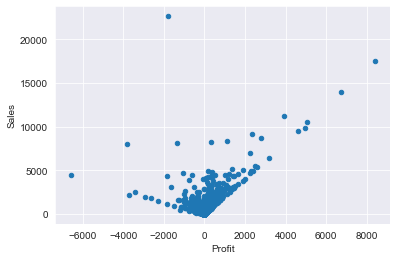

In [144]:
sns.set_style('darkgrid')
df_store.plot(y="Sales", x="Profit", kind="scatter")
plt.show()

In [145]:
df_store['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

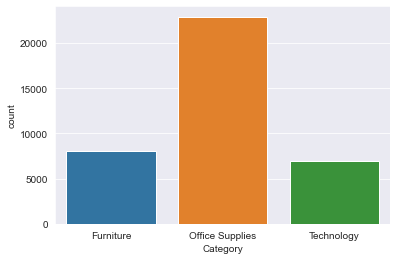

<Figure size 1080x1080 with 0 Axes>

In [146]:
df_category_count = df_store.groupby(['Category'])['Quantity'].sum().reset_index(name='count') 
sns.barplot(x="Category",y="count", data=df_category_count)
plt.figure(figsize=(15,15))
plt.show()

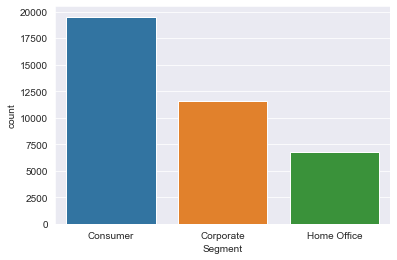

<Figure size 1080x1080 with 0 Axes>

In [147]:
df_category_count = df_store.groupby(['Segment'])['Quantity'].sum().reset_index(name='count') 
sns.barplot(x="Segment",y="count", data=df_category_count)
plt.figure(figsize=(15,15))
plt.show()

In [148]:
df_manufacturer_count = df_store.groupby(['Manufacturer'])['Quantity'].sum().reset_index(name='count') 
df_manufacturer_count

,Manufacturer,count
0,3-ring staple pack,26
1,3D Systems,14
2,3M,113
3,ACCOHIDE,99
4,AT&T,167
...,...,...
178,Xerox,3221
179,Xerox 1971,28
180,XtraLife,61
181,Zebra,46


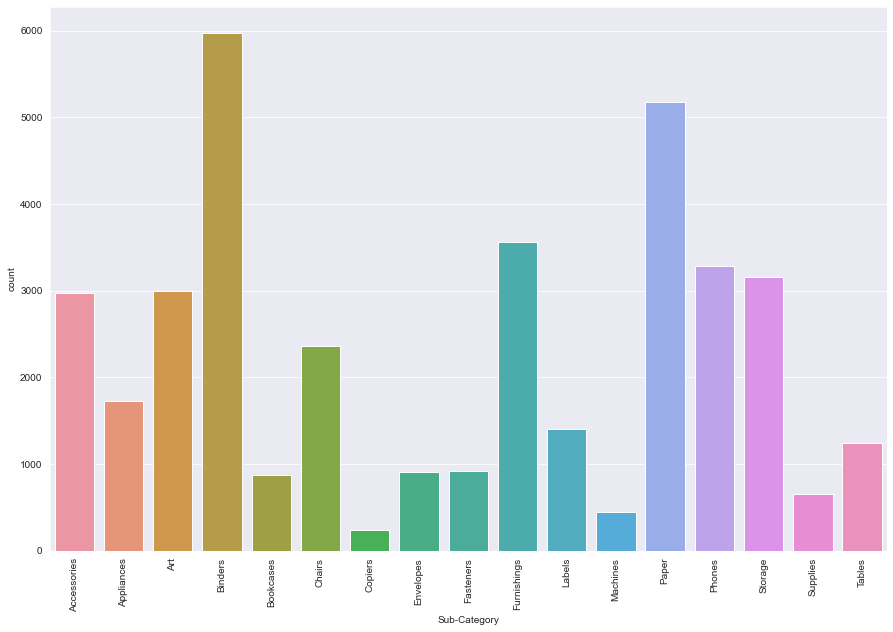

In [149]:
df_sub_category_count = df_store.groupby(['Sub-Category'])['Quantity'].sum().reset_index(name='count') 
plt.figure(figsize=(15,10))
sns.barplot(x="Sub-Category",y="count", data=df_sub_category_count)
plt.xticks(rotation=90)
plt.show()

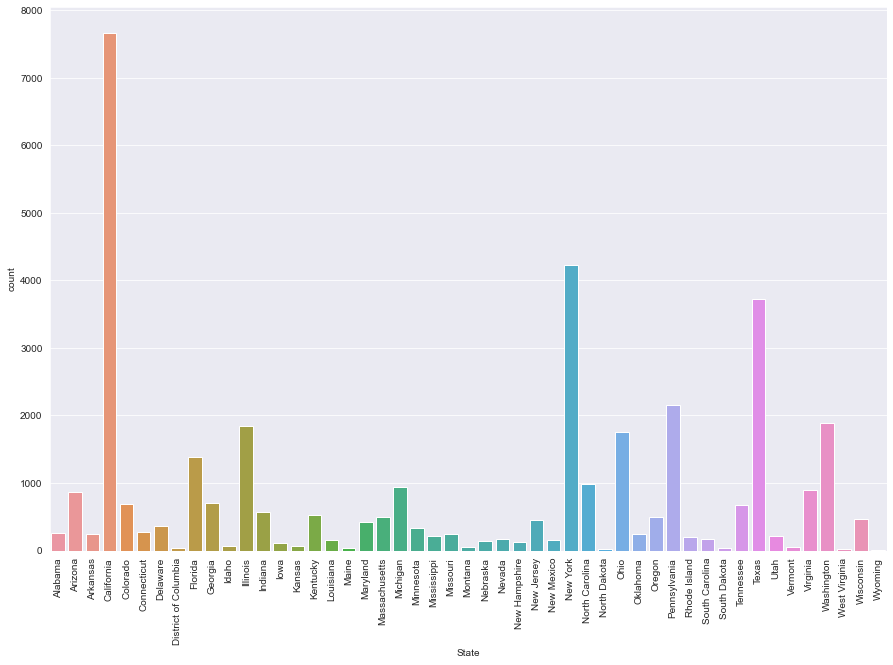

In [150]:
df_store_count = df_store.groupby(['State'])['Quantity'].sum().reset_index(name='count') 
df_store_count.sort_values('count',ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x="State",y="count", data=df_store_count)
plt.xticks(rotation=90)
plt.show()

## Map Plot of State wise Sales Distribution

In [151]:
json_file = open('us-states.json') 
usa = json.load(json_file)

In [152]:
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
usa_map.choropleth(
    geo_data=usa,
    data=df_store_count,
    columns=['State', 'count'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sales Distribution based on item in USA'
)
usa_map

## Correlation Data Points

In [158]:
correlation = df_store.corr()

<AxesSubplot:>

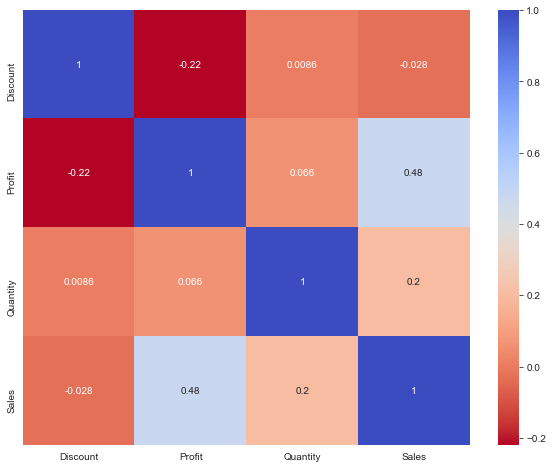

In [159]:
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation,annot=True,cmap='coolwarm_r')

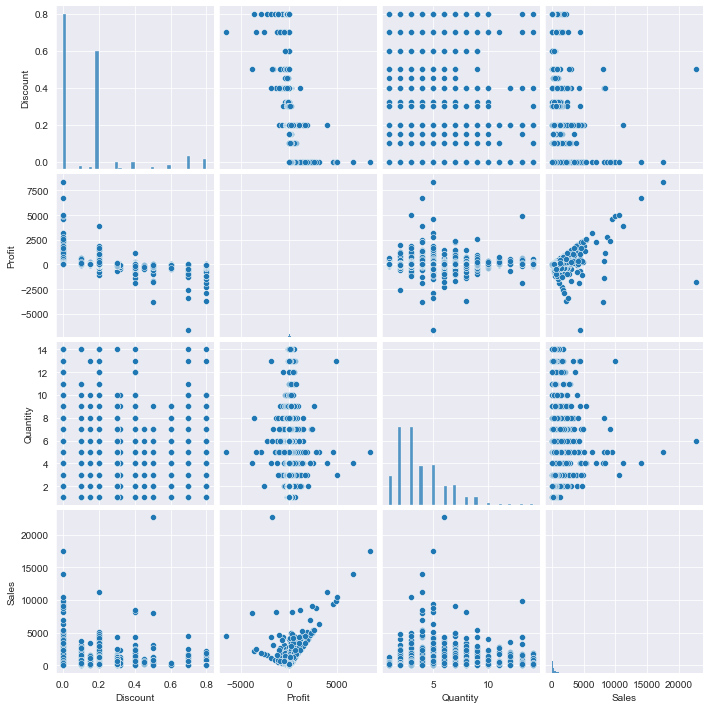

In [162]:
sns.pairplot(df_store)